In [19]:
import numpy as np
import pandas as pd

In [20]:
# Load the dataset
df = pd.read_csv('../plot_results/combined_grid_search_results.csv')
df['null_padding_feature'].fillna(False, inplace=True)
df['null_padding_target'].fillna(False, inplace=True)
df.drop_duplicates(inplace=True)
df[df['model'] =='GRU']

/tmp/ipykernel_474443/78402501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['null_padding_feature'].fillna(False, inplace=True)
/tmp/ipykernel_474443/78402501.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['null_padding_feature'].fillna(False, inplace=True)
/tmp/ipykernel_474443/78402501.py:4:

,standard_normalized,NAB_standard_rank,NAB_reward_fn_rank,reward_fn_normalized,detection_counters,confusion_matrix,post_processing_strategy,anomaly_threshold,topk,long_window,...,anomaly_9,anomaly_10,anomaly_11,anomaly_12,anomaly_13,anomaly_14,anomaly_15,anomaly_16,anomaly_17,anomaly_18
1056,-36.084694,11.0,11.0,-13.530147,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25294, 227, 952, 15]",likelihood,0.99800,1,30,...,True,False,False,True,False,False,False,False,True,False
1057,-22.943381,10.0,10.0,-4.769272,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25340, 181, 953, 14]",likelihood,0.99850,1,30,...,True,False,False,True,False,False,False,False,True,False
1058,-12.280989,9.0,9.0,2.338990,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25385, 136, 956, 11]",likelihood,0.99900,1,30,...,True,False,False,True,False,False,False,False,True,False
1059,4.557061,6.0,5.0,11.809970,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25461, 60, 961, 6]",likelihood,0.99970,1,30,...,False,False,False,True,False,False,False,False,True,False
1060,6.583376,3.0,3.0,13.160847,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25468, 53, 961, 6]",likelihood,0.99975,1,30,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,-9.811410,8.0,4.0,2.230990,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25401, 120, 954, 13]",mahalanobis,99.50000,1,0,...,False,False,False,True,False,False,False,False,True,False
1316,-3.015580,3.0,2.0,6.761543,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25425, 96, 957, 10]",mahalanobis,99.60000,1,0,...,False,False,False,True,False,False,False,False,True,False
1317,3.699809,1.0,1.0,11.238469,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25449, 72, 959, 8]",mahalanobis,99.70000,1,0,...,False,False,False,True,False,False,False,False,True,False
1318,0.965583,2.0,3.0,5.906880,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25472, 49, 963, 4]",mahalanobis,99.80000,1,0,...,False,False,False,True,False,False,False,False,True,False


In [5]:
df.columns

Index(['standard_normalized', 'NAB_standard_rank', 'NAB_reward_fn_rank',
       'reward_fn_normalized', 'detection_counters', 'confusion_matrix',
       'post_processing_strategy', 'anomaly_threshold', 'topk', 'long_window',
       'short_window', 'precision', 'recall', 'f1', 'accuracy', 'standard_raw',
       'reward_fn_raw', 'model', 'fill_nan_value', 'null_padding_feature',
       'null_padding_target', 'http_code', 'aggregation', 'training_time',
       'inference_time', 'anomaly_0', 'anomaly_1', 'anomaly_2', 'anomaly_3',
       'anomaly_4', 'anomaly_5', 'anomaly_6', 'anomaly_7', 'anomaly_8',
       'anomaly_9', 'anomaly_10', 'anomaly_11', 'anomaly_12', 'anomaly_13',
       'anomaly_14', 'anomaly_15', 'anomaly_16', 'anomaly_17', 'anomaly_18'],
      dtype='object')

In [6]:
# selected_df = df[(df['aggregation'] == 'count') 
#                  & (df['http_code'] == '5xx') 
#                     & (df['model'] == 'A3TGCN') 
#                  # & (df['fill_nan_value'] == 'zero')
#                  & (df['null_padding_feature'] == True)
#                  # & (df['post_processing_strategy'] == 'mahalanobis')
#             ]
selected_df = df[(df['aggregation'] == 'count') 
                 & (df['http_code'] == '5xx') 
                    & (df['model'] == 'GRU') 
                 # & (df['fill_nan_value'] == 'zero')
                 # & (df['null_padding_feature'] == True)
                 # & (df['post_processing_strategy'] == 'mahalanobis')
            ]
selected_df = selected_df.sort_values(by='anomaly_threshold', ascending=True)
selected_df

,standard_normalized,NAB_standard_rank,NAB_reward_fn_rank,reward_fn_normalized,detection_counters,confusion_matrix,post_processing_strategy,anomaly_threshold,topk,long_window,...,anomaly_9,anomaly_10,anomaly_11,anomaly_12,anomaly_13,anomaly_14,anomaly_15,anomaly_16,anomaly_17,anomaly_18
1056,-36.084694,11.0,11.0,-13.530147,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25294, 227, 952, 15]",likelihood,0.99800,1,30,...,True,False,False,True,False,False,False,False,True,False
1078,-40.415432,11.0,11.0,-18.171691,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25300, 221, 955, 12]",likelihood,0.99800,1,30,...,False,False,False,True,False,False,False,False,True,False
1067,-32.965444,11.0,11.0,-14.959419,"{'issue_detected': 0, 'issue_detected_ids': []...","[25343, 178, 956, 11]",likelihood,0.99800,1,30,...,False,False,False,False,False,False,False,False,True,False
1057,-22.943381,10.0,10.0,-4.769272,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25340, 181, 953, 14]",likelihood,0.99850,1,30,...,True,False,False,True,False,False,False,False,True,False
1079,-30.250641,10.0,10.0,-11.395164,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25336, 185, 956, 11]",likelihood,0.99850,1,30,...,False,False,False,True,False,False,False,False,True,False
1068,-27.560987,10.0,10.0,-11.356448,"{'issue_detected': 0, 'issue_detected_ids': []...","[25362, 159, 958, 9]",likelihood,0.99850,1,30,...,False,False,False,False,False,False,False,False,True,False
1058,-12.280989,9.0,9.0,2.338990,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25385, 136, 956, 11]",likelihood,0.99900,1,30,...,True,False,False,True,False,False,False,False,True,False
1080,-17.008152,9.0,9.0,-2.566838,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25382, 139, 957, 10]",likelihood,0.99900,1,30,...,False,False,False,True,False,False,False,False,True,False
1069,-18.142126,9.0,9.0,-5.077207,"{'issue_detected': 0, 'issue_detected_ids': []...","[25396, 125, 960, 7]",likelihood,0.99900,1,30,...,False,False,False,False,False,False,False,False,True,False
1059,4.557061,6.0,5.0,11.809970,"{'issue_detected': 1, 'issue_detected_ids': [1...","[25461, 60, 961, 6]",likelihood,0.99970,1,30,...,False,False,False,True,False,False,False,False,True,False


<Axes: xlabel='anomaly_threshold'>

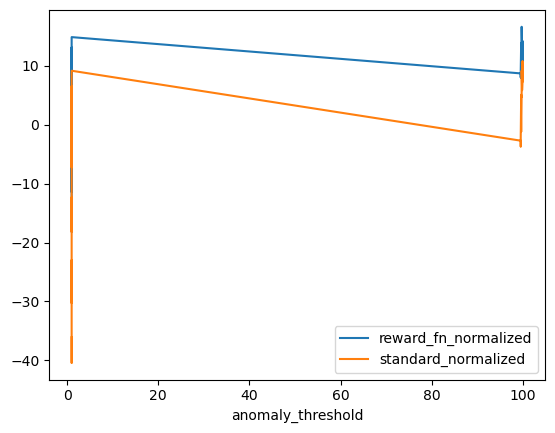

In [7]:
selected_df.plot(x='anomaly_threshold', y=['reward_fn_normalized','standard_normalized'])

(15, 44) (18, 44)
Index(['standard_normalized', 'NAB_standard_rank', 'NAB_reward_fn_rank',
       'reward_fn_normalized', 'detection_counters', 'confusion_matrix',
       'post_processing_strategy', 'anomaly_threshold', 'topk', 'long_window',
       'short_window', 'precision', 'recall', 'f1', 'accuracy', 'standard_raw',
       'reward_fn_raw', 'model', 'fill_nan_value', 'null_padding_feature',
       'null_padding_target', 'http_code', 'aggregation', 'training_time',
       'inference_time', 'anomaly_0', 'anomaly_1', 'anomaly_2', 'anomaly_3',
       'anomaly_4', 'anomaly_5', 'anomaly_6', 'anomaly_7', 'anomaly_8',
       'anomaly_9', 'anomaly_10', 'anomaly_11', 'anomaly_12', 'anomaly_13',
       'anomaly_14', 'anomaly_15', 'anomaly_16', 'anomaly_17', 'anomaly_18'],
      dtype='object')


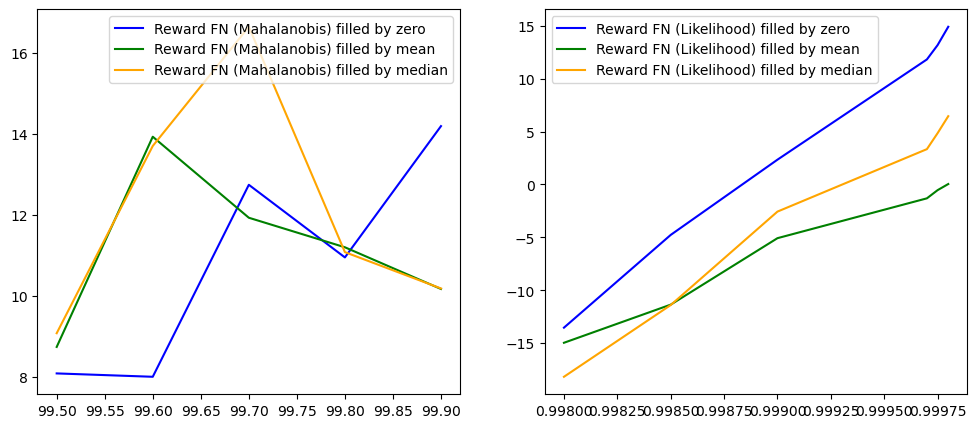

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
ax0 = axes[0]
ax1 = axes[1]

mahalanobis_df = selected_df[selected_df['post_processing_strategy'] == 'mahalanobis']
likelihood_df = selected_df[selected_df['post_processing_strategy'] == 'likelihood']
print(mahalanobis_df.shape, likelihood_df.shape)
print(mahalanobis_df.columns)

zero_fill_mahalanobis = mahalanobis_df[mahalanobis_df['fill_nan_value'] == 'zero'].sort_values(by='anomaly_threshold', ascending=True)
mean_fill_mahalanobis = mahalanobis_df[mahalanobis_df['fill_nan_value'] == 'mean'].sort_values(by='anomaly_threshold', ascending=True)
median_fill_mahalanobis = mahalanobis_df[mahalanobis_df['fill_nan_value'] == 'median'].sort_values(by='anomaly_threshold', ascending=True)
ax0.plot(zero_fill_mahalanobis['anomaly_threshold'], zero_fill_mahalanobis['reward_fn_normalized'], label='Reward FN (Mahalanobis) filled by zero', color='blue')
ax0.plot(mean_fill_mahalanobis['anomaly_threshold'], mean_fill_mahalanobis['reward_fn_normalized'], label='Reward FN (Mahalanobis) filled by mean', color='green')
ax0.plot(median_fill_mahalanobis['anomaly_threshold'], median_fill_mahalanobis['reward_fn_normalized'], label='Reward FN (Mahalanobis) filled by median', color='orange')
ax0.legend(loc='best')

zero_fill_likelihood = likelihood_df[likelihood_df['fill_nan_value'] == 'zero'].sort_values(by='anomaly_threshold', ascending=True)
mean_fill_likelihood = likelihood_df[likelihood_df['fill_nan_value'] == 'mean'].sort_values(by='anomaly_threshold', ascending=True)
median_fill_likelihood = likelihood_df[likelihood_df['fill_nan_value'] == 'median'].sort_values(by='anomaly_threshold', ascending=True)
ax1.plot(zero_fill_likelihood['anomaly_threshold'], zero_fill_likelihood['reward_fn_normalized'], label='Reward FN (Likelihood) filled by zero', color='blue')
ax1.plot(mean_fill_likelihood['anomaly_threshold'], mean_fill_likelihood['reward_fn_normalized'], label='Reward FN (Likelihood) filled by mean', color='green')
ax1.plot(median_fill_likelihood['anomaly_threshold'], median_fill_likelihood['reward_fn_normalized'], label='Reward FN (Likelihood) filled by median', color='orange')
ax1.legend(loc='best')


In [9]:
model_config = df[['model','http_code', 'aggregation', 'fill_nan_value', 'null_padding_feature','post_processing_strategy']].value_counts().to_frame(name='count')
model_config

count
model  http_code aggregation fill_nan_value null_padding_feature post_processing_strategy       
A3TGCN 4xx       avg         mean           False                likelihood                    6
       5xx       avg         mean           False                likelihood                    6
                 min         zero           True                 likelihood                    6
                                            False                likelihood                    6
                             median         True                 likelihood                    6
...                                                                                          ...
                 max         zero           True                 mahalanobis                   5
                                            False                mahalanobis                   5
       4xx       max         zero           False                mahalanobis                   5
       5xx       max         median         True                 mahalanobis                   5
GRU    5xx       min         zero           False                mahalanobis                   5

[144 rows x 1 columns]

In [10]:
configuration_df = model_config.index.values
configuration_df

array([('A3TGCN', '4xx', 'avg', 'mean', False, 'likelihood'),
       ('A3TGCN', '5xx', 'avg', 'mean', False, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'zero', True, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'zero', False, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'median', True, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'median', False, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'mean', True, 'likelihood'),
       ('A3TGCN', '5xx', 'min', 'mean', False, 'likelihood'),
       ('A3TGCN', '5xx', 'max', 'zero', True, 'likelihood'),
       ('A3TGCN', '5xx', 'max', 'zero', False, 'likelihood'),
       ('A3TGCN', '5xx', 'max', 'median', True, 'likelihood'),
       ('A3TGCN', '5xx', 'max', 'median', False, 'likelihood'),
       ('A3TGCN', '5xx', 'max', 'mean', True, 'likelihood'),
       ('A3TGCN', '5xx', 'count', 'zero', True, 'likelihood'),
       ('A3TGCN', '5xx', 'count', 'zero', False, 'likelihood'),
       ('A3TGCN', '5xx', 'count', 'median', True, 'likelihood'),


In [11]:
import re
anomaly_columns = [f for f in df.columns if re.search(r'anomaly_\d+',f)]
print(anomaly_columns)

rows =[]
ids = []
for model, http_code, aggregation, fill_nan_value, null_padding_feature, post_processing_strategy in configuration_df:
    config_df = df[(df['model'] == model)
                   & (df['http_code'] == http_code)
                   & (df['aggregation'] == aggregation)
                   & (df['fill_nan_value'] == fill_nan_value)
                   & (df['null_padding_feature'] == null_padding_feature)
                     & (df['post_processing_strategy'] == post_processing_strategy)
                  ].sort_values(by='reward_fn_normalized', ascending=False).iloc[:2,:]
    print(config_df[['reward_fn_normalized','standard_normalized']])
    id = f'{model}|{http_code}|{aggregation}|{fill_nan_value}|{null_padding_feature}|{post_processing_strategy}'
    ids.append(id)
    # print(config_df.shape)
    rows.append(config_df[anomaly_columns].any(axis=0).values)
    
    # config_df = config_df.sort_values(by='anomaly_threshold', ascending=True)
    # plt.figure(figsize=(8, 5))
    # plt.plot(config_df['anomaly_threshold'], config_df['reward_fn_normalized'], marker='o')
    # plt.title(f'Model: {model}, HTTP Code: {http_code}, Aggregation: {aggregation}, Fill NaN: {fill_nan_value}, Null Padding: {null_padding_feature}')
    # plt.xlabel('Anomaly Threshold')
    # plt.ylabel('Reward FN Normalized')
    # plt.grid()
    # plt.show()

['anomaly_0', 'anomaly_1', 'anomaly_2', 'anomaly_3', 'anomaly_4', 'anomaly_5', 'anomaly_6', 'anomaly_7', 'anomaly_8', 'anomaly_9', 'anomaly_10', 'anomaly_11', 'anomaly_12', 'anomaly_13', 'anomaly_14', 'anomaly_15', 'anomaly_16', 'anomaly_17', 'anomaly_18']
     reward_fn_normalized  standard_normalized
728             11.423019             3.976633
731             11.249957             8.980198
     reward_fn_normalized  standard_normalized
200              6.021106            -1.494657
199              3.358630            -5.488370
     reward_fn_normalized  standard_normalized
269             -4.242718            -6.364076
267             -4.435700            -6.653550
     reward_fn_normalized  standard_normalized
291             -4.242718            -6.364076
289             -4.435700            -6.653550
     reward_fn_normalized  standard_normalized
352              5.516781            -4.882723
353              5.060643            -2.935351
     reward_fn_normalized  standard_no

In [12]:
rows = np.array(rows)
rows.shape

(144, 19)

In [11]:
anomaly_presence_df = pd.DataFrame(rows, columns=anomaly_columns)
anomaly_presence_df.index = ids
anomaly_presence_df

,anomaly_0,anomaly_1,anomaly_2,anomaly_3,anomaly_4,anomaly_5,anomaly_6,anomaly_7,anomaly_8,anomaly_9,anomaly_10,anomaly_11,anomaly_12,anomaly_13,anomaly_14,anomaly_15,anomaly_16,anomaly_17,anomaly_18
A3TGCN|4xx|avg|mean|False|likelihood,False,False,False,True,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False
A3TGCN|5xx|avg|mean|False|likelihood,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,False
A3TGCN|5xx|min|zero|True|likelihood,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A3TGCN|5xx|min|zero|False|likelihood,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
A3TGCN|5xx|min|median|True|likelihood,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3TGCN|5xx|max|zero|True|mahalanobis,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,True,False
A3TGCN|5xx|max|zero|False|mahalanobis,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False
A3TGCN|4xx|max|zero|False|mahalanobis,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
A3TGCN|5xx|max|median|True|mahalanobis,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False


In [12]:
anomaly_presence_df.sum(axis=0)

anomaly_0      18
anomaly_1       2
anomaly_2       0
anomaly_3      23
anomaly_4       9
anomaly_5       0
anomaly_6      79
anomaly_7     126
anomaly_8      65
anomaly_9      22
anomaly_10     21
anomaly_11     17
anomaly_12     47
anomaly_13     11
anomaly_14     42
anomaly_15      9
anomaly_16      9
anomaly_17     93
anomaly_18      0
dtype: int64

In [22]:
training_and_inference_time_df = df[['model','http_code', 'aggregation', 'fill_nan_value', 'null_padding_feature']].value_counts().to_frame(name='count').index.values
training_and_inference_time_df

array([('A3TGCN', '4xx', 'avg', 'mean', False),
       ('A3TGCN', '4xx', 'avg', 'mean', True),
       ('GRU', '4xx', 'count', 'median', False),
       ('GRU', '4xx', 'count', 'mean', False),
       ('GRU', '4xx', 'avg', 'zero', False),
       ('GRU', '4xx', 'avg', 'median', False),
       ('GRU', '4xx', 'avg', 'mean', False),
       ('A3TGCN', '5xx', 'min', 'zero', True),
       ('A3TGCN', '5xx', 'min', 'zero', False),
       ('A3TGCN', '5xx', 'min', 'median', True),
       ('A3TGCN', '5xx', 'min', 'median', False),
       ('A3TGCN', '5xx', 'min', 'mean', True),
       ('A3TGCN', '5xx', 'min', 'mean', False),
       ('A3TGCN', '5xx', 'max', 'zero', True),
       ('A3TGCN', '5xx', 'max', 'zero', False),
       ('A3TGCN', '5xx', 'max', 'median', True),
       ('A3TGCN', '5xx', 'max', 'median', False),
       ('GRU', '4xx', 'count', 'zero', False),
       ('GRU', '4xx', 'max', 'mean', False),
       ('GRU', '4xx', 'max', 'median', False),
       ('GRU', '5xx', 'count', 'median', False),
 

In [41]:
training_and_inference_time_subsets = dict()
for model, http_code, aggregation, fill_nan_value, null_padding_feature in training_and_inference_time_df:
    config_df = df[(df['model'] == model)
                   & (df['http_code'] == http_code)
                   & (df['aggregation'] == aggregation)
                   & (df['fill_nan_value'] == fill_nan_value)
                   & (df['null_padding_feature'] == null_padding_feature)
                  ][['training_time', 'inference_time']].mean(axis=0).values
    id = f'{model}|{http_code}|{aggregation}|{fill_nan_value}|{null_padding_feature}'
    training_and_inference_time_subsets[id] = config_df
    
    # sort_values(by='reward_fn_normalized', ascending=False).iloc[:2,:]

In [42]:
keys = training_and_inference_time_subsets.keys()
gru_keys = [k for k in keys if 'GRU' in k]
graph_keys = [k for k in keys if 'A3TGCN' in k]

In [43]:
gru_keys.sort()
graph_keys.sort()
gru_keys, len(gru_keys), len(graph_keys)

(['GRU|4xx|avg|mean|False',
  'GRU|4xx|avg|median|False',
  'GRU|4xx|avg|zero|False',
  'GRU|4xx|count|mean|False',
  'GRU|4xx|count|median|False',
  'GRU|4xx|count|zero|False',
  'GRU|4xx|max|mean|False',
  'GRU|4xx|max|median|False',
  'GRU|4xx|max|zero|False',
  'GRU|4xx|min|mean|False',
  'GRU|4xx|min|median|False',
  'GRU|4xx|min|zero|False',
  'GRU|5xx|avg|mean|False',
  'GRU|5xx|avg|median|False',
  'GRU|5xx|avg|zero|False',
  'GRU|5xx|count|mean|False',
  'GRU|5xx|count|median|False',
  'GRU|5xx|count|zero|False',
  'GRU|5xx|max|mean|False',
  'GRU|5xx|max|median|False',
  'GRU|5xx|max|zero|False',
  'GRU|5xx|min|mean|False',
  'GRU|5xx|min|median|False',
  'GRU|5xx|min|zero|False'],
 24,
 48)

In [44]:
df['model'].value_counts()

model
A3TGCN    528
GRU       264
Name: count, dtype: int64

In [47]:
for gru_key in gru_keys:
    data = training_and_inference_time_subsets[gru_key]
    print(gru_key, 'training', data[0], 'inference', data[1])

GRU|4xx|avg|mean|False training 11.437231063842772 inference 1.1792006492614746
GRU|4xx|avg|median|False training 10.389772176742554 inference 1.1087079048156738
GRU|4xx|avg|zero|False training 10.638772249221802 inference 1.1456968784332275
GRU|4xx|count|mean|False training 10.265199661254885 inference 1.125396490097046
GRU|4xx|count|median|False training 10.661261558532717 inference 1.2068078517913818
GRU|4xx|count|zero|False training 10.624264001846312 inference 1.1481924057006836
GRU|4xx|max|mean|False training 10.694801092147827 inference 1.137892723083496
GRU|4xx|max|median|False training 10.085151195526125 inference 1.1236283779144287
GRU|4xx|max|zero|False training 10.04564642906189 inference 1.1384031772613523
GRU|4xx|min|mean|False training 10.61557388305664 inference 1.113087177276611
GRU|4xx|min|median|False training 10.158019065856934 inference 1.1261019706726074
GRU|4xx|min|zero|False training 9.961753845214844 inference 1.1068124771118164
GRU|5xx|avg|mean|False training 

In [49]:
for graph_key in graph_keys:
    data = training_and_inference_time_subsets[graph_key]
    print(graph_key, 'training', data[0], 'inference', data[1])

A3TGCN|4xx|avg|mean|False training 486.8884408473969 inference 65.5674500465393
A3TGCN|4xx|avg|mean|True training 489.2905976772308 inference 67.01224708557129
A3TGCN|4xx|avg|median|False training 487.2113800048828 inference 65.13944745063782
A3TGCN|4xx|avg|median|True training 490.3874619007111 inference 65.01511693000793
A3TGCN|4xx|avg|zero|False training 492.6088728904724 inference 65.81677341461182
A3TGCN|4xx|avg|zero|True training 491.9131028652191 inference 68.04820704460144
A3TGCN|4xx|count|mean|False training 493.1753919124603 inference 62.88763165473938
A3TGCN|4xx|count|mean|True training 488.8269143104553 inference 66.08375430107117
A3TGCN|4xx|count|median|False training 489.53827452659607 inference 67.5664656162262
A3TGCN|4xx|count|median|True training 486.587809085846 inference 70.3960177898407
A3TGCN|4xx|count|zero|False training 485.2839887142181 inference 66.87365651130676
A3TGCN|4xx|count|zero|True training 487.998348236084 inference 65.98433566093445
A3TGCN|4xx|max|mea

In [87]:
time_df = df[['model', 'http_code', 'aggregation', 'fill_nan_value', 'null_padding_feature', 'training_time','inference_time',]].groupby(['model','http_code', 'aggregation','fill_nan_value', 'null_padding_feature']).mean().groupby(['model', 'http_code', 'aggregation','null_padding_feature']).mean()
time_df

training_time  \
model  http_code aggregation null_padding_feature                  
A3TGCN 4xx       avg         False                    488.902898   
                             True                     490.530387   
                 count       False                    489.332552   
                             True                     487.804357   
                 max         False                    496.003639   
                             True                     517.174279   
                 min         False                    491.031578   
                             True                     492.621317   
       5xx       avg         False                    301.533707   
                             True                     302.803102   
                 count       False                    298.730227   
                             True                     304.021009   
                 max         False                    299.921289   
                             True                     303.204009   
                 min         False                    300.834372   
                             True                     302.595326   
GRU    4xx       avg         False                     10.821925   
                 count       False                     10.516908   
                 max         False                     10.275200   
                 min         False                     10.245116   
       5xx       avg         False                     10.508871   
                 count       False                     10.869574   
                 max         False                     10.433546   
                 min         False                      9.974479   

                                                   inference_time  
model  http_code aggregation null_padding_feature                  
A3TGCN 4xx       avg         False                      65.507890  
                             True                       66.691857  
                 count       False                      65.775918  
                             True                       67.488036  
                 max         False                      71.635875  
                             True                       77.224136  
                 min         False                      67.738269  
                             True                       72.070131  
       5xx       avg         False                      39.756088  
                             True                       39.867280  
                 count       False                      39.843961  
                             True                       39.952071  
                 max         False                      40.151030  
                             True                       39.953806  
                 min         False                      39.790318  
                             True                       39.879092  
GRU    4xx       avg         False                       1.144535  
                 count       False                       1.160132  
                 max         False                       1.133308  
                 min         False                       1.115334  
       5xx       avg         False                       1.173648  
                 count       False                       1.102566  
                 max         False                       1.077536  
                 min         False                       1.072597

In [88]:
time_df = time_df.reset_index()
time_df

,model,http_code,aggregation,null_padding_feature,training_time,inference_time
0,A3TGCN,4xx,avg,False,488.902898,65.507890
1,A3TGCN,4xx,avg,True,490.530387,66.691857
2,A3TGCN,4xx,count,False,489.332552,65.775918
3,A3TGCN,4xx,count,True,487.804357,67.488036
4,A3TGCN,4xx,max,False,496.003639,71.635875
5,A3TGCN,4xx,max,True,517.174279,77.224136
6,A3TGCN,4xx,min,False,491.031578,67.738269
7,A3TGCN,4xx,min,True,492.621317,72.070131
8,A3TGCN,5xx,avg,False,301.533707,39.756088
9,A3TGCN,5xx,avg,True,302.803102,39.867280


In [89]:
visualize_df = time_df.sort_values(by=['http_code','aggregation','model'], ascending=False)
visualize_df

,model,http_code,aggregation,null_padding_feature,training_time,inference_time
23,GRU,5xx,min,False,9.974479,1.072597
14,A3TGCN,5xx,min,False,300.834372,39.790318
15,A3TGCN,5xx,min,True,302.595326,39.879092
22,GRU,5xx,max,False,10.433546,1.077536
12,A3TGCN,5xx,max,False,299.921289,40.151030
13,A3TGCN,5xx,max,True,303.204009,39.953806
21,GRU,5xx,count,False,10.869574,1.102566
10,A3TGCN,5xx,count,False,298.730227,39.843961
11,A3TGCN,5xx,count,True,304.021009,39.952071
20,GRU,5xx,avg,False,10.508871,1.173648


In [90]:
refactor_visualize_df = pd.DataFrame()
refactor_visualize_df['Subset'] = '\\texttt{' + visualize_df['http_code']+ ' ' + visualize_df['aggregation'] + '}'
refactor_visualize_df['Model'] = np.where(visualize_df['null_padding_feature'], visualize_df['model'] + '*', visualize_df['model'] )
refactor_visualize_df['Training (seconds)'] = visualize_df['training_time']
refactor_visualize_df['Inference (seconds)'] = visualize_df['inference_time']
refactor_visualize_df

,Subset,Model,Training (seconds),Inference (seconds)
23,\texttt{5xx min},GRU,9.974479,1.072597
14,\texttt{5xx min},A3TGCN,300.834372,39.790318
15,\texttt{5xx min},A3TGCN*,302.595326,39.879092
22,\texttt{5xx max},GRU,10.433546,1.077536
12,\texttt{5xx max},A3TGCN,299.921289,40.151030
13,\texttt{5xx max},A3TGCN*,303.204009,39.953806
21,\texttt{5xx count},GRU,10.869574,1.102566
10,\texttt{5xx count},A3TGCN,298.730227,39.843961
11,\texttt{5xx count},A3TGCN*,304.021009,39.952071
20,\texttt{5xx avg},GRU,10.508871,1.173648


In [93]:
latex_table = refactor_visualize_df.to_latex( 
    index=False,
    caption="Training and Inference time on different subsets",
    label="tab:training_inference_time",
    escape=False,
    float_format="{:0.2f}".format,
    column_format= 'llrr'
)
latex_table

'\\begin{table}\n\\caption{Training and Inference time on different subsets}\n\\label{tab:training_inference_time}\n\\begin{tabular}{llrr}\n\\toprule\nSubset & Model & Training (seconds) & Inference (seconds) \\\\\n\\midrule\n\\texttt{5xx min} & GRU & 9.97 & 1.07 \\\\\n\\texttt{5xx min} & A3TGCN & 300.83 & 39.79 \\\\\n\\texttt{5xx min} & A3TGCN* & 302.60 & 39.88 \\\\\n\\texttt{5xx max} & GRU & 10.43 & 1.08 \\\\\n\\texttt{5xx max} & A3TGCN & 299.92 & 40.15 \\\\\n\\texttt{5xx max} & A3TGCN* & 303.20 & 39.95 \\\\\n\\texttt{5xx count} & GRU & 10.87 & 1.10 \\\\\n\\texttt{5xx count} & A3TGCN & 298.73 & 39.84 \\\\\n\\texttt{5xx count} & A3TGCN* & 304.02 & 39.95 \\\\\n\\texttt{5xx avg} & GRU & 10.51 & 1.17 \\\\\n\\texttt{5xx avg} & A3TGCN & 301.53 & 39.76 \\\\\n\\texttt{5xx avg} & A3TGCN* & 302.80 & 39.87 \\\\\n\\texttt{4xx min} & GRU & 10.25 & 1.12 \\\\\n\\texttt{4xx min} & A3TGCN & 491.03 & 67.74 \\\\\n\\texttt{4xx min} & A3TGCN* & 492.62 & 72.07 \\\\\n\\texttt{4xx max} & GRU & 10.28 & 1.13 

In [94]:
print(latex_table)

\begin{table}
\caption{Training and Inference time on different subsets}
\label{tab:training_inference_time}
\begin{tabular}{llrr}
\toprule
Subset & Model & Training (seconds) & Inference (seconds) \\
\midrule
\texttt{5xx min} & GRU & 9.97 & 1.07 \\
\texttt{5xx min} & A3TGCN & 300.83 & 39.79 \\
\texttt{5xx min} & A3TGCN* & 302.60 & 39.88 \\
\texttt{5xx max} & GRU & 10.43 & 1.08 \\
\texttt{5xx max} & A3TGCN & 299.92 & 40.15 \\
\texttt{5xx max} & A3TGCN* & 303.20 & 39.95 \\
\texttt{5xx count} & GRU & 10.87 & 1.10 \\
\texttt{5xx count} & A3TGCN & 298.73 & 39.84 \\
\texttt{5xx count} & A3TGCN* & 304.02 & 39.95 \\
\texttt{5xx avg} & GRU & 10.51 & 1.17 \\
\texttt{5xx avg} & A3TGCN & 301.53 & 39.76 \\
\texttt{5xx avg} & A3TGCN* & 302.80 & 39.87 \\
\texttt{4xx min} & GRU & 10.25 & 1.12 \\
\texttt{4xx min} & A3TGCN & 491.03 & 67.74 \\
\texttt{4xx min} & A3TGCN* & 492.62 & 72.07 \\
\texttt{4xx max} & GRU & 10.28 & 1.13 \\
\texttt{4xx max} & A3TGCN & 496.00 & 71.64 \\
\texttt{4xx max} & A3TGCN* &